In [32]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,10)

# Data Import

In [33]:
import yfinance as yf

In [34]:
a1 = yf.Ticker("RELIANCE.NS")
df = a1.history(period="8d" , interval = '5m')

In [35]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2021-01-20 09:15:00+05:30,2019.699951,2031.349976,2016.300049,2023.800049,0,0,0
2021-01-20 09:20:00+05:30,2023.800049,2025.000000,2018.949951,2022.000000,300047,0,0
2021-01-20 09:25:00+05:30,2021.599976,2021.599976,2007.900024,2007.900024,336641,0,0
2021-01-20 09:30:00+05:30,2007.849976,2011.099976,2002.599976,2007.000000,254389,0,0
2021-01-20 09:35:00+05:30,2006.650024,2010.150024,2005.000000,2005.550049,177877,0,0
...,...,...,...,...,...,...,...
2021-02-01 15:05:00+05:30,1894.949951,1897.300049,1893.050049,1895.050049,205612,0,0
2021-02-01 15:10:00+05:30,1894.849976,1895.949951,1889.099976,1892.400024,268521,0,0
2021-02-01 15:15:00+05:30,1892.449951,1897.000000,1891.650024,1896.300049,179208,0,0


In [36]:
# other alternatives nsepy / quandl / nsepy

# Pivot Points

In [37]:
a1 = yf.Ticker("RELIANCE.NS")
df = a1.history(period="120d" , interval = '1d')
last_day = df.shift(-1).copy()

last_day['Pivot'] = (last_day['High'] + last_day['Low'] + last_day['Close'])/3
last_day['R1'] = 2*last_day['Pivot'] - last_day['Low']
last_day['S1'] = 2*last_day['Pivot'] - last_day['High']
last_day['R2'] = last_day['Pivot'] + (last_day['High'] - last_day['Low'])
last_day['S2'] = last_day['Pivot'] - (last_day['High'] - last_day['Low'])
last_day['R3'] = last_day['Pivot'] + 2*(last_day['High'] - last_day['Low'])
last_day['S3'] = last_day['Pivot'] - 2*(last_day['High'] - last_day['Low'])

In [38]:
last_day.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Pivot,R1,S1,R2,S2,R3,S3
Date,,,,,,,,,,,,,,
2021-01-25,1925.000000,1925.000000,1888.0,1895.000000,19553809.0,0.0,0.0,1902.666667,1917.333333,1880.333333,1939.666667,1865.666667,1976.666667,1828.666667
2021-01-27,1880.150024,1923.300049,1870.0,1876.550049,15722291.0,0.0,0.0,1889.950033,1909.900065,1856.600016,1943.250081,1836.649984,1996.550130,1783.349935
2021-01-28,1894.300049,1913.099976,1830.0,1841.949951,20173258.0,0.0,0.0,1861.683309,1893.366618,1810.266642,1944.783285,1778.583333,2027.883260,1695.483358
2021-01-29,1859.400024,1905.000000,1848.0,1895.300049,15766940.0,0.0,0.0,1882.766683,1917.533366,1860.533366,1939.766683,1825.766683,1996.766683,1768.766683
2021-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


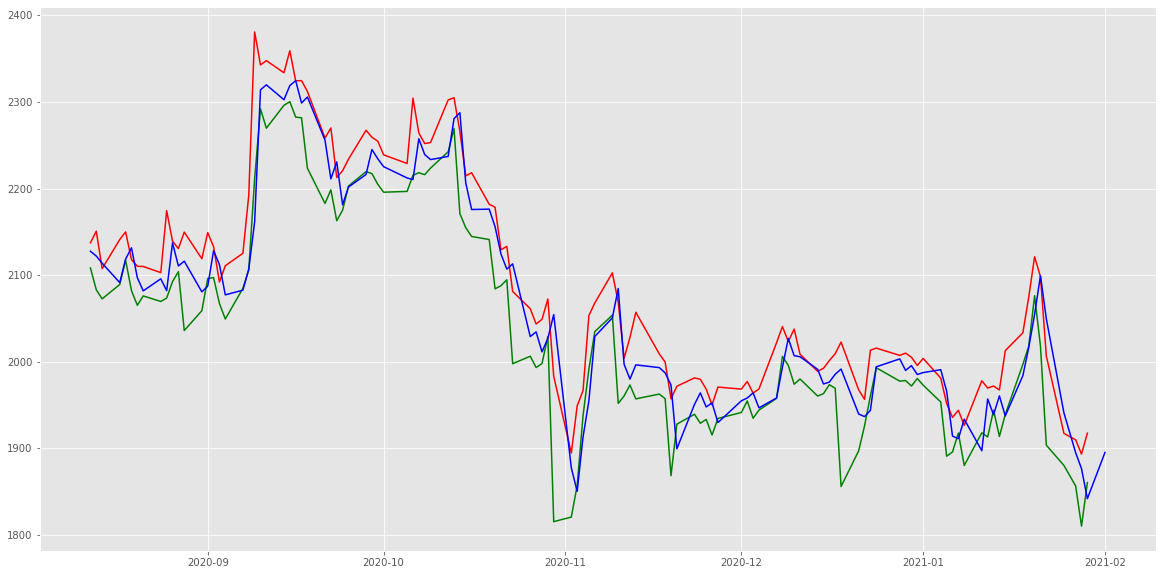

In [41]:
#plt.plot(last_day['Pivot'],color = 'purple')
plt.plot(last_day['R1'],color = 'red')
plt.plot(last_day['S1'],color = 'green')
plt.plot(df['Close'],color = 'blue')

In [42]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-08-12,2121.000000,2145.000000,2106.800049,2127.600098,13967116,0,0
2020-08-13,2128.000000,2138.899902,2110.000000,2122.050049,11459190,0,0
2020-08-14,2122.550049,2157.000000,2089.250000,2113.800049,15333164,0,0
2020-08-17,2105.000000,2105.000000,2070.100098,2091.350098,14296834,0,0
2020-08-18,2085.000000,2134.300049,2082.350098,2118.550049,14097746,0,0
...,...,...,...,...,...,...,...
2021-01-25,2034.949951,2034.949951,1932.000000,1941.000000,25016570,0,0
2021-01-27,1925.000000,1925.000000,1888.000000,1895.000000,19553809,0,0
2021-01-28,1880.150024,1923.300049,1870.000000,1876.550049,15722291,0,0


# TA-lib

In [11]:
import talib

In [47]:
df['RSI'] = talib.RSI(df['Close'], timeperiod =14)

In [48]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI
Date,,,,,,,,
2020-08-12,2121.000000,2145.000000,2106.800049,2127.600098,13967116,0,0,NaN
2020-08-13,2128.000000,2138.899902,2110.000000,2122.050049,11459190,0,0,NaN
2020-08-14,2122.550049,2157.000000,2089.250000,2113.800049,15333164,0,0,NaN
2020-08-17,2105.000000,2105.000000,2070.100098,2091.350098,14296834,0,0,NaN
2020-08-18,2085.000000,2134.300049,2082.350098,2118.550049,14097746,0,0,NaN
...,...,...,...,...,...,...,...,...
2021-01-25,2034.949951,2034.949951,1932.000000,1941.000000,25016570,0,0,45.209809
2021-01-27,1925.000000,1925.000000,1888.000000,1895.000000,19553809,0,0,40.994850
2021-01-28,1880.150024,1923.300049,1870.000000,1876.550049,15722291,0,0,39.407890


In [27]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI
Date,,,,,,,,
2020-08-12,2121.000000,2145.000000,2106.800049,2127.600098,13967116,0,0,NaN
2020-08-13,2128.000000,2138.899902,2110.000000,2122.050049,11459190,0,0,NaN
2020-08-14,2122.550049,2157.000000,2089.250000,2113.800049,15333164,0,0,NaN
2020-08-17,2105.000000,2105.000000,2070.100098,2091.350098,14296834,0,0,NaN
2020-08-18,2085.000000,2134.300049,2082.350098,2118.550049,14097746,0,0,NaN
...,...,...,...,...,...,...,...,...
2021-01-25,2034.949951,2034.949951,1932.000000,1941.000000,25016570,0,0,45.209809
2021-01-27,1925.000000,1925.000000,1888.000000,1895.000000,19553809,0,0,40.994850
2021-01-28,1880.150024,1923.300049,1870.000000,1876.550049,15722291,0,0,39.407890


In [51]:
pip install talib

  Using cached talib-0.1.1.tar.gz (1.3 kB)
  Running setup.py clean for talib
Failed to build talib
    Running setup.py install for talib: started
    Running setup.py install for talib: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\tanay\\AppData\\Local\\Temp\\pip-install-b1__bu13\\talib\\setup.py'"'"'; __file__='"'"'C:\\Users\\tanay\\AppData\\Local\\Temp\\pip-install-b1__bu13\\talib\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\tanay\AppData\Local\Temp\pip-wheel-rr0eq5u7'
       cwd: C:\Users\tanay\AppData\Local\Temp\pip-install-b1__bu13\talib\
  Complete output (29 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\talib
  copying talib\cli.py -> build\lib\talib
  copying talib\__init__.py -> build\lib\talib
  installing to build\bdist.win-amd64\wheel
  running install
  Traceback (most recent call last):
    File "<stri